<a href="https://colab.research.google.com/github/abyss155/cats-vs-dogs-classifier/blob/main/Dog_vs_Cat_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

In [ ]:
# Download the dataset from Kaggle (tongpython/cat-and-dog)
path = kagglehub.dataset_download("tongpython/cat-and-dog")

In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cat-and-dog


In [ ]:
!ls $path


test_set  training_set


In [ ]:
import os

train_cats = '/kaggle/input/cat-and-dog/training_set/training_set/cats'
train_dogs = '/kaggle/input/cat-and-dog/training_set/training_set/dogs'

cat_count = len(os.listdir(train_cats))
dog_count = len(os.listdir(train_dogs))

print("Number of cat images:", cat_count)
print("Number of dog images:", dog_count)
print("Total training images:", cat_count + dog_count)


Number of cat images: 4001
Number of dog images: 4006
Total training images: 8007


In [ ]:
test_cats = '/kaggle/input/cat-and-dog/test_set/test_set/cats'
test_dogs = '/kaggle/input/cat-and-dog/test_set/test_set/dogs'

print("Number of test cat images:", len(os.listdir(test_cats)))
print("Number of test dog images:", len(os.listdir(test_dogs)))


Number of test cat images: 1012
Number of test dog images: 1013


In [ ]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
# Correct training dataset paths
cat_dir = "/kaggle/input/cat-and-dog/training_set/training_set/cats"
dog_dir = "/kaggle/input/cat-and-dog/training_set/training_set/dogs"


In [ ]:
images = []
labels = []

# Load cat images
for file in os.listdir(cat_dir):
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):   # Only image files
        img = Image.open(os.path.join(cat_dir, file)).convert('RGB')
        img = img.resize((128, 128))
        images.append(np.array(img))
        labels.append(0)  # Cat = 0

# Load dog images
for file in os.listdir(dog_dir):
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(dog_dir, file)).convert('RGB')
        img = img.resize((128, 128))
        images.append(np.array(img))
        labels.append(1)  # Dog = 1


# Convert to numpy arrays
X = np.array(images, dtype="float32")
y = np.array(labels)

# Normalize pixel values to range [0,1]
X = X / 255.0


In [ ]:
# Train-validation split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Training samples:", X_train.shape)
print("Validation samples:", X_val.shape)

Training samples: (6404, 128, 128, 3)
Validation samples: (1601, 128, 128, 3)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random


In [ ]:
# Pick random cat and dog images
cat_dir = "/kaggle/input/cat-and-dog/training_set/training_set/cats"
dog_dir = "/kaggle/input/cat-and-dog/training_set/training_set/dogs"

cat_file = random.choice(os.listdir(cat_dir))
dog_file = random.choice(os.listdir(dog_dir))



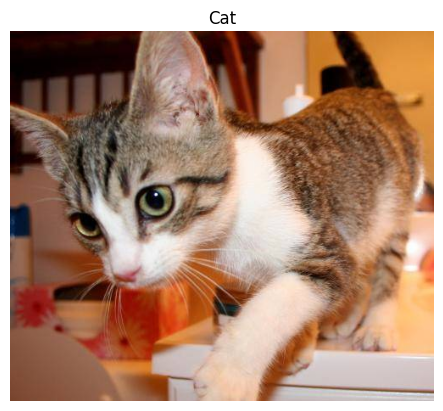

In [ ]:
# Display cat
img = mpimg.imread(os.path.join(cat_dir, cat_file))
plt.imshow(img)
plt.title("Cat")
plt.axis("off")
plt.show()


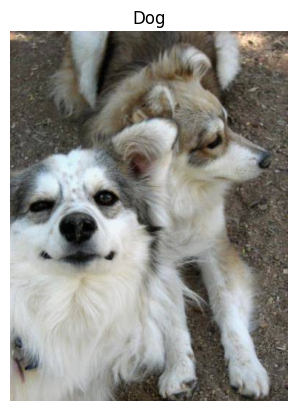

In [ ]:

# Display dog
img = mpimg.imread(os.path.join(dog_dir, dog_file))
plt.imshow(img)
plt.title("Dog")
plt.axis("off")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,              # 10-15 epochs as planned
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.5522 - loss: 0.8222 - val_accuracy: 0.6727 - val_loss: 0.6125
Epoch 2/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.7213 - loss: 0.5541 - val_accuracy: 0.7146 - val_loss: 0.5514
Epoch 3/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.7961 - loss: 0.4373 - val_accuracy: 0.7002 - val_loss: 0.6521
Epoch 4/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.8653 - loss: 0.3259 - val_accuracy: 0.7277 - val_loss: 0.6118
Epoch 5/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 255s 986ms/step - accuracy: 0.9162 - loss: 0.2109 - val_accuracy: 0.7233 - val_loss: 0.7679
Epoch 6/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.9612 - loss: 0.1110 - val_accuracy: 0.7208 - val_loss: 0.9177
Epoch 7/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9885 - loss: 0.0473 - val_accuracy: 0.7227 - val_loss: 1.1792
Epoch 8/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9985 - loss: 0.0168 - val_a

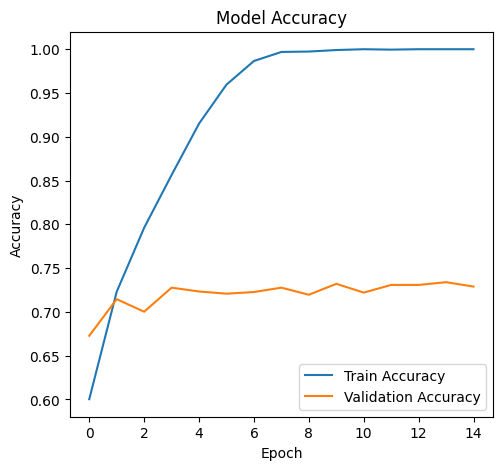

In [31]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

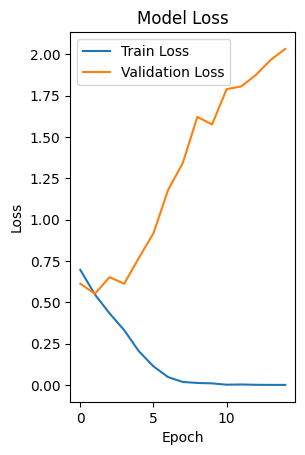

In [32]:
# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [33]:
plt.show()

In [34]:
# Evaluate model on validation set ----
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


Validation Accuracy: 72.89%
Validation Loss: 2.0318


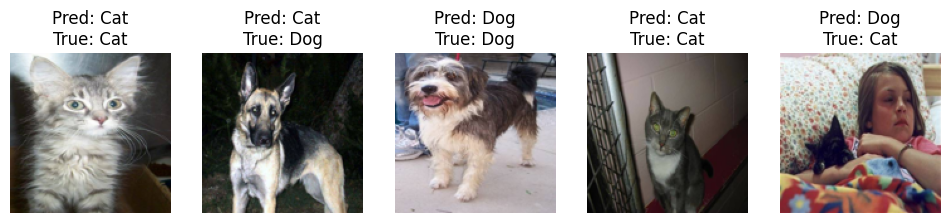

In [35]:
# Test on a few random images ----
# pick 5 random samples from validation set
random_idx = random.sample(range(len(X_val)), 5)

plt.figure(figsize=(12,6))
for i, idx in enumerate(random_idx):
    img = X_val[idx]
    true_label = y_val[idx]

    # model expects shape (1, 128,128,3)
    pred = model.predict(img.reshape(1,128,128,3), verbose=0)[0][0]
    predicted_label = 1 if pred > 0.5 else 0  # 1=dog, 0=cat

    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {'Dog' if predicted_label==1 else 'Cat'}\nTrue: {'Dog' if true_label==1 else 'Cat'}")

plt.show()

In [79]:
# Save in new Keras format
model.save("cats_vs_dogs_model.keras")
print("Model saved as cats_vs_dogs_model.keras")


Model saved as cats_vs_dogs_model.keras


In [38]:
# Load model
from tensorflow.keras.models import load_model
loaded_model = load_model("cats_vs_dogs_model.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [39]:
# Verify
loss, acc = loaded_model.evaluate(X_val, y_val, verbose=0)
print(f"Reloaded model accuracy: {acc*100:.2f}%")

Reloaded model accuracy: 72.89%


Uploading my images

In [77]:
from google.colab import files
# Use the trained or reloaded model (whichever exists)
clf = loaded_model if 'loaded_model' in globals() else model


In [78]:
# --- Optional: compute mapping once (skip if you already computed above) ---
probs = clf.predict(X_val, verbose=0).ravel()
dog_is_one = (probs[y_val==1].mean() > probs[y_val==0].mean())


In [72]:
# Upload images
uploaded = files.upload()

Saving cat1.jpeg to cat1.jpeg
Saving cat.jpeg to cat.jpeg
Saving dog.jpg to dog.jpg


In [73]:
# Grid size
cols = min(5, len(uploaded))
rows = (len(uploaded) + cols - 1) // cols
plt.figure(figsize=(15, 3*rows))


<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

In [74]:
def preprocess(path):
    img = Image.open(path).convert("RGB")
    img_resized = img.resize((128,128))
    arr = np.array(img_resized, dtype=np.float32) / 255.0
    return img, arr.reshape(1,128,128,3)

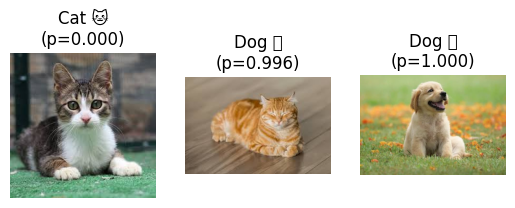

In [75]:
for i, (filename, _) in enumerate(uploaded.items()):
    orig_img, arr = preprocess(filename)
    p = clf.predict(arr, verbose=0).ravel()[0]

    # Interpret probability based on your mapping
    if dog_is_one:
        is_dog = (p > 0.5)
    else:
        is_dog = (p < 0.5)   # invert if mapping is reversed

    label = "Dog 🐶" if is_dog else "Cat 🐱"
    plt.subplot(rows, cols, i+1)
    plt.imshow(orig_img)
    plt.axis("off")
    plt.title(f"{label}\n(p={p:.3f})")

In [76]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>